<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

<ipython-input-1-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [6]:
df = pd.read_csv(file_name)
#df.head()

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [11]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv") #error

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


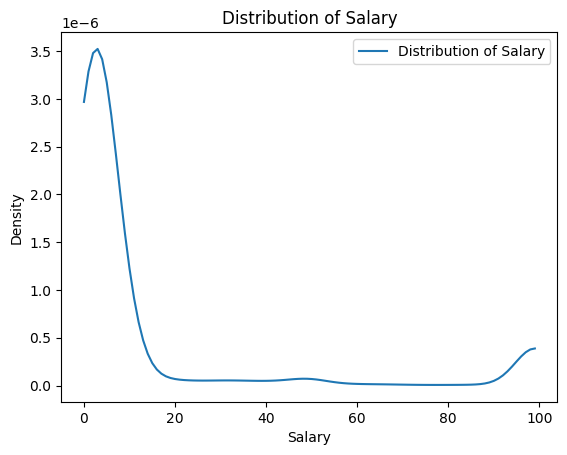

In [29]:
# your code goes here
import numpy as np
#import seaborn as sns # the module dos not exist
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt 

##Date mining und wrangling
#mumber_duplicates=len(df[df.duplicated()])
##number_duplicates # 0, that is there is no duplicates since data used here 
## are cleaned data from the previous section
#df['ConvertedComp'].head(50)

#missing values
#missing_values_ConvertedComp = df['ConvertedComp'].isnull().sum()
#missing_values_ConvertedComp #816 NaN

## count_values
most_frequent_ConvertedComp = df['ConvertedComp'].value_counts().idxmax() #2.000.000
most_frequent_ConvertedComp
# in some cases one can replace missing values from the column 'ConvrtedComp' by the most frequent

df_ConvertedComp_NaNReplacedWithMostFrequent = df['ConvertedComp'].fillna(most_frequent_ConvertedComp)
#df_ConvertedComp_NaNReplacedWithMostFrequent.isnull().sum() # 0, that NaN have been replaced
# but we have not been entittled to do so

# Graphics
column_data=df_ConvertedComp_NaNReplacedWithMostFrequent
#column_data = df['ConvertedComp']

column_data.shape[0] #11398
## calculate the kernel density estimate (kde)
kde = gaussian_kde(column_data)
## define the range of x-axis based on the data
x_values = np.linspace(column_data.min(), column_data.max(), 100)
##calculate density values using KDE for each point in the x_values
density_values = kde(x_values)
## plot the distribution curve
#plt.fill_between(x_values, density_values, alpha=0.2)
plt.plot(density_values, label='Distribution of Salary')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.legend()
plt.show()

Plot the histogram for the column `ConvertedComp`.


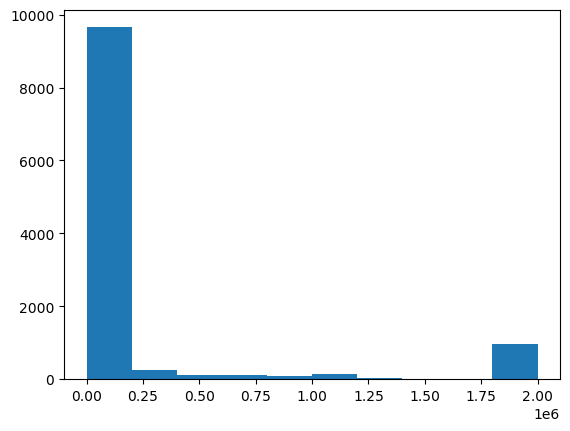

In [30]:
# your code goes here
plt.hist(column_data)
plt.show()

What is the median of the column `ConvertedComp`?


In [31]:
# your code goes here
median_ConvertedComp = column_data.median()
median_ConvertedComp

63016.0

How many responders identified themselves only as a **Man**?


In [33]:
# your code goes here
#df['Gender'].value_counts()
df['Gender'].value_counts()['Man']  #10480

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [61]:
# your code goes here
df['Gender'].value_counts()['Woman']  #10480

731

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [34]:
# your code goes here
#df['Age'].value_counts().head(50)
#df['Age'].min() # 16.0
#df['Age'].median() # 29.0
#df['Age'].max() # 99.0

df['Age'].describe()
# min=16.0, Q1 = 25.0, median = 29.0,  Q3 = 35.0, max = 99.0

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


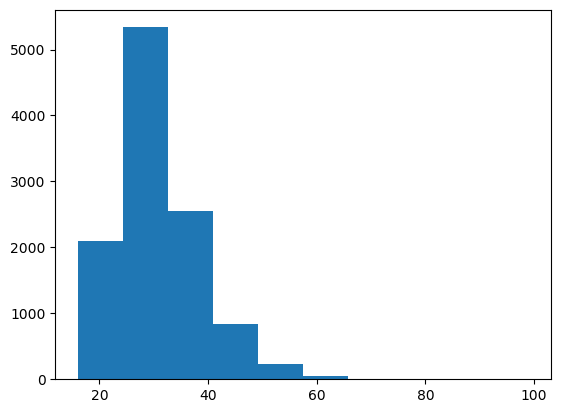

In [35]:
# your code goes here
plt.hist(df['Age'])
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


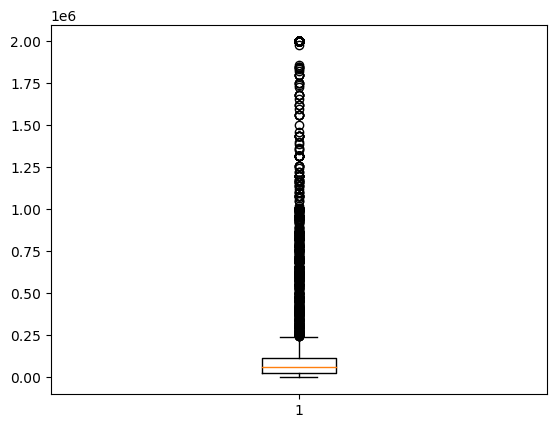

In [36]:
# your code goes here
plt.boxplot(column_data)
plt.show()
# from it plot it turns out that there outliers above Q3 which is 75th percentile and nothing below Q1 which is 25th percentile

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [37]:
# your code goes here
#column_data.describe()
# the results can be read out from the table below
# min=0.0, Q1=29016, median=26535,85 Q3=115464, max=2000000

Q1=column_data.quantile(0.25)
#Q1
Q3=column_data.quantile(0.75)
#Q3
#IQR = Interqartile Range

IQR = Q3 - Q1
#IQR
print(f"Interquartile Range:{IQR}")

Interquartile Range:86448.0


Find out the upper and lower bounds.


In [38]:
# your code goes here
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: -100656.0
Upper Bound: 245136.0


Identify how many outliers are there in the `ConvertedComp` column.


In [39]:
# your code goes here
outliers = column_data[(column_data<lower_bound)|(column_data>upper_bound)]
#outliers.shape[0]
print(f"Number of outliers in ConvertedComp: {outliers.shape[0]}")

Number of outliers in ConvertedComp: 1627


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [44]:
# your code goes here
#column_data_withoutOuliers=column_data.apply(lambda x: x if lower_bound <= x <= upper_bound else none)
#column_data.isnull().sum() #0 NaN 

column_data_withoutOuliers=column_data.where((column_data >=lower_bound)&(column_data <= upper_bound))

#column_data_withoutOuliers.isnull().sum() # 1627: this provides the number of NaN that have replaced outliers
#column_data_withoutOuliers.shape[0] # 11398 the size of the columun where outliers have been replaced by NaN
#column_data.shape[0]
#len(column_data_withoutOuliers)
#plt.boxplot(column_data_withoutOuliers)
#plt.show()

11398

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [61]:
# your code goes here

#df.corr() # builts up the correlation matrix of all numerical comluns
#df.corr()['Age'] # this correlation between Age and all other numerical columns
# df.corr()['Age'].drop('Age')
#correlations_with_Age = df.corr()['Age']
#df.head()

##############################################Alternative method#############################################
##### since df.corr() does not work due to the platform used here ##################

# Choose a specific column, e.g., 'A'
target_column = 'Age'

# Ensure to only compare with other numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.drop(target_column)
#numerical_columns

# Dictionary to store correlation results
correlations = {}

# Calculate correlation between target_column and each other numerical column
for column in numerical_columns:
    X = df[target_column]
    Y = df[column]
    
    # Calculate means
    mean_X = X.mean()
    mean_Y = Y.mean()
    
    # Calculate covariance between X and Y
    covariance = ((X - mean_X) * (Y - mean_Y)).sum()
    
    # Calculate standard deviations of X and Y
    std_X = np.sqrt(((X - mean_X) ** 2).sum())
    std_Y = np.sqrt(((Y - mean_Y) ** 2).sum())
    
    # Calculate Pearson correlation coefficient
    correlation = covariance / (std_X * std_Y)
    correlations[column] = correlation

# Display results
print(f"Correlation of column '{target_column}' with other numerical columns:")
for col, corr_value in correlations.items():
    print(f"{target_column} - {col}: {corr_value}")


Correlation of column 'Age' with other numerical columns:
Age - Respondent: 0.00399147008326977
Age - CompTotal: 0.0067315186528469715
Age - ConvertedComp: 0.10029880488618223
Age - WorkWeekHrs: 0.03631118027794372
Age - CodeRevHrs: -0.017042153954192896


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
